In [51]:
import requests
import pandas as pd
import numpy as np




In [52]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [53]:
df = pd.DataFrame(r.json()['data'])

In [54]:
df.value = df.value.astype(int)

In [55]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')

In [56]:
df.set_index('timestamp', inplace=True)

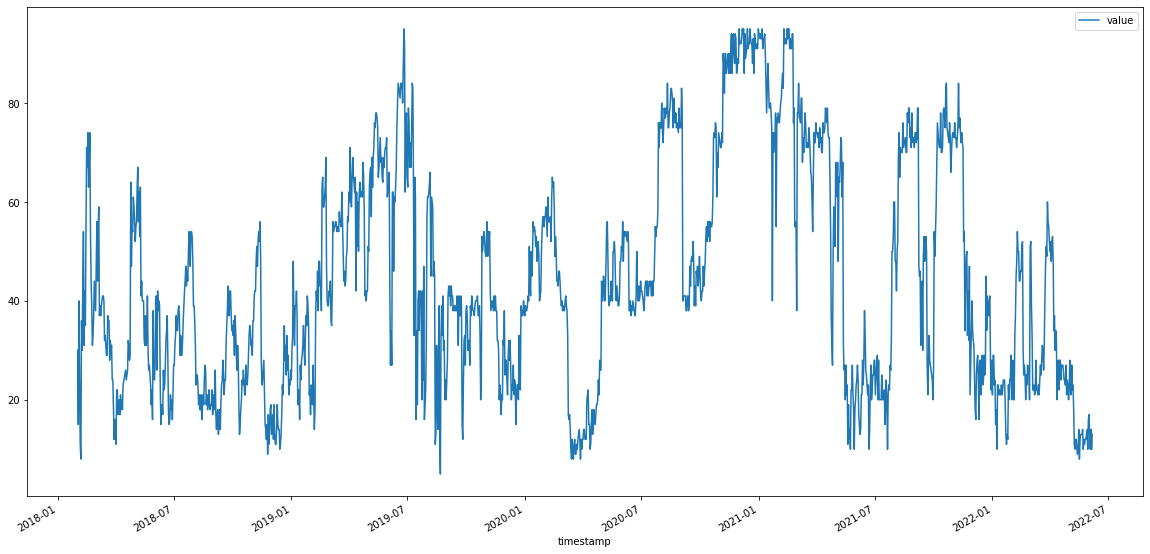

In [50]:
df.plot(figsize=(20,10))

In [58]:
df = df[::-1]

In [61]:
import yfinance as yf

In [62]:
df1 = yf.download('BTC-USD')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [63]:
df1

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-06-02,30467.488281
2022-06-03,29704.390625
2022-06-04,29832.914062


In [65]:
df1.index.name = 'timestamp'

In [66]:
tog = df.merge(df1, on='timestamp')

In [67]:
tog

,value,value_classification,time_until_update,Close
timestamp,,,,
2018-02-01,30,Fear,NaN,9170.540039
2018-02-02,15,Extreme Fear,NaN,8830.750000
2018-02-03,40,Fear,NaN,9174.910156
2018-02-04,24,Extreme Fear,NaN,8277.009766
2018-02-05,11,Extreme Fear,NaN,6955.270020
...,...,...,...,...
2022-06-02,13,Extreme Fear,NaN,30467.488281
2022-06-03,10,Extreme Fear,NaN,29704.390625
2022-06-04,14,Extreme Fear,NaN,29832.914062


In [68]:
tog['change'] = tog.Close.pct_change()

In [69]:
tog

,value,value_classification,time_until_update,Close,change
timestamp,,,,,
2018-02-01,30,Fear,NaN,9170.540039,NaN
2018-02-02,15,Extreme Fear,NaN,8830.750000,-0.037052
2018-02-03,40,Fear,NaN,9174.910156,0.038973
2018-02-04,24,Extreme Fear,NaN,8277.009766,-0.097865
2018-02-05,11,Extreme Fear,NaN,6955.270020,-0.159688
...,...,...,...,...,...
2022-06-02,13,Extreme Fear,NaN,30467.488281,0.022430
2022-06-03,10,Extreme Fear,NaN,29704.390625,-0.025046
2022-06-04,14,Extreme Fear,NaN,29832.914062,0.004327


In [70]:
tog['position'] = np.where(tog.value> 50, 1 ,0)

In [71]:
stratergy = tog.position * tog.change 

In [81]:
import matplotlib.pyplot as plt

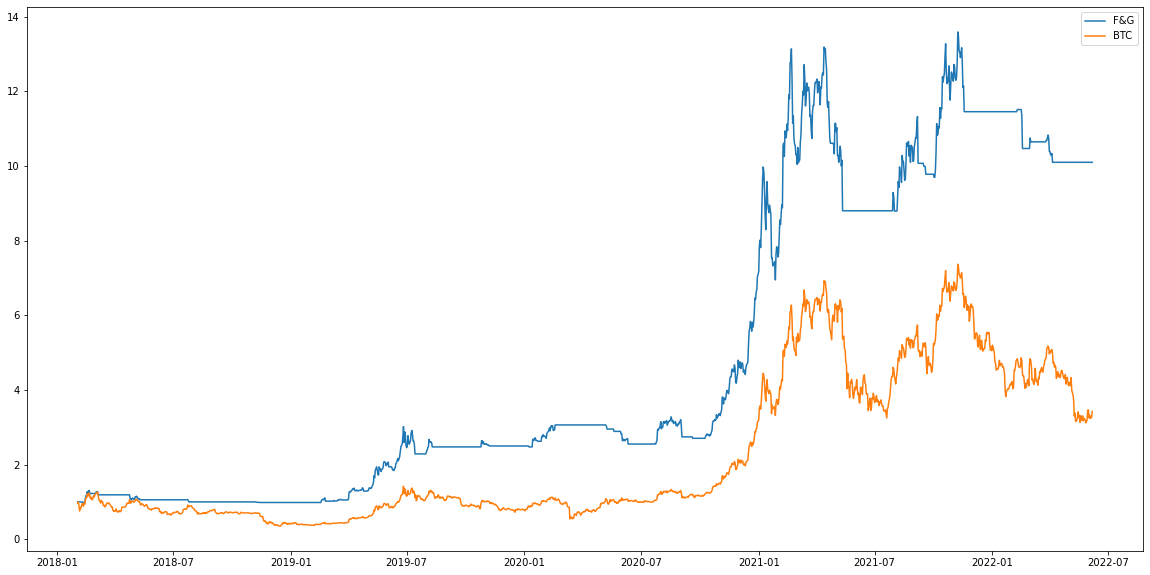

In [82]:
plt.figure(figsize=(20,10))
plt.plot((stratergy + 1).cumprod(), label ='F&G')
plt.plot((tog.change + 1).cumprod(), label ='BTC')
plt.legend()